In [73]:
from sklearn.datasets import make_regression

In [74]:
# Crea muestras aleatorias  y random_state siempre es 42 (magic number)
X, y = make_regression(n_samples=150, n_features=1, noise=50, random_state=42)

In [75]:
# Design matrix
# X: 150 samples(filas) 1 feature
# y: 150 1 dimension
X.shape, y.shape

((150, 1), (150,))

Text(0.5, 1.0, 'Dataset')

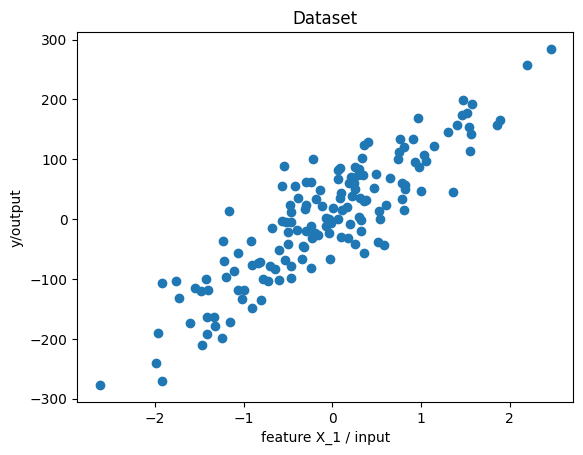

In [76]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.xlabel("feature X_1 / input")
plt.ylabel("y/output")
plt.title("Dataset")

In [77]:
from sklearn.model_selection import train_test_split

# Split trian (find parameters to minimize the cost function) and test 20 % 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)
X_train.shape

(120, 1)

# Model

In [78]:
import numpy as np

In [79]:
class LinearReg:

    def __init__(self, lr = 0.01, epochs = 100):
        self.lr = lr
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):

        #This is going to look like (150,1) where m is 150 and n 1
        m, n = X.shape

        #Generates a random of n values in a list of 1 rows
        self.weights = np.random.rand(n, 1)
        self.bias = np.random.rand(1)

        # convert a value like (150,) to (150,1)
        y = y.reshape(m, 1)

        losses = list()
        b_list = list()
        w_list = list()

        for epoch in range(self.epochs):

            # calculate prediction
            # y ^ = wx + b
            y_hat = np.dot(X, self.weights) + self.bias

            # get loss - L - J
            loss = np.mean((y - y_hat)**2) # MSE
            losses.append(loss)

            # calculate gradient
            dw = (-2 / m) * np.dot(X.T, (y - y_hat))
            db = (-2 / m) * np.sum((y - y_hat))

            # update params
            self.weights = self.weights - self.lr * dw
            self.bias = self.bias - self.lr * db

            w_list.append(self.weights)
            b_list.append(self.bias)

            print(f"epoch: {epoch}, loss: {loss}, w: {self.weights}, b: {self.bias}")

        return self.weights, self.bias, losses, b_list, w_list
    
    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

In [80]:
# model = LinearReg()
# model = LinearReg(lr=0.1,epochs=200)
model = LinearReg(lr=0.1,epochs=50)
#model = LinearReg(lr=0.15,epochs=30)

w, b, losses, b_list, w_list = model.fit(X_train, y_train)

epoch: 0, loss: 11317.964879856714, w: [[18.54829888]], b: [0.45549055]
epoch: 1, loss: 8236.88222207973, w: [[33.46093287]], b: [0.45499766]
epoch: 2, loss: 6226.3254395802105, w: [[45.51278264]], b: [0.70029266]
epoch: 3, loss: 4912.143938208624, w: [[55.25669824]], b: [1.09508584]
epoch: 4, loss: 4051.736651378025, w: [[63.13788695]], b: [1.57145378]
epoch: 5, loss: 3487.522016785483, w: [[69.5150303]], b: [2.08239266]
epoch: 6, loss: 3116.963935783575, w: [[74.67722752]], b: [2.59620876]
epoch: 7, loss: 2873.228541301497, w: [[78.85759608]], b: [3.09231011]
epoch: 8, loss: 2712.6791102134885, w: [[82.24419396]], b: [3.55806378]
epoch: 9, loss: 2606.7773160589236, w: [[84.98879475]], b: [3.98646176]
epoch: 10, loss: 2536.828877997303, w: [[87.213941]], b: [4.37439811]
epoch: 11, loss: 2490.5686098329816, w: [[89.01861602]], b: [4.72140702]
epoch: 12, loss: 2459.9370823833287, w: [[90.48280694]], b: [5.02874661]
epoch: 13, loss: 2439.6306140337083, w: [[91.67117722]], b: [5.29874119]

Text(0, 0.5, 'loss')

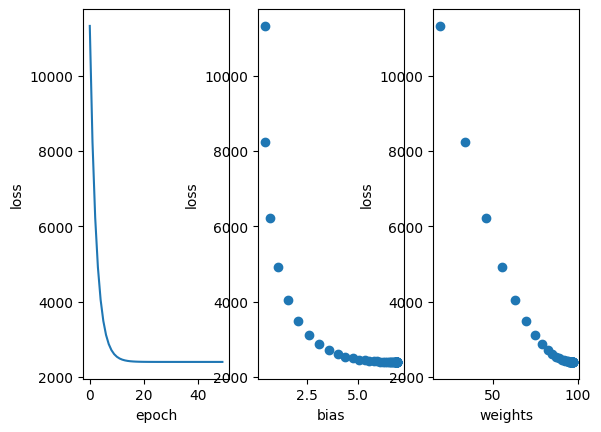

In [81]:
plt.subplot(1, 3, 1)
plt.plot(np.arange(len(losses)), losses)
plt.xlabel("epoch")
plt.ylabel("loss")

plt.subplot(1, 3, 2)
plt.scatter(b_list, losses)
plt.xlabel("bias")
plt.ylabel("loss")

plt.subplot(1, 3, 3)
plt.scatter(w_list, losses)
plt.xlabel("weights")
plt.ylabel("loss")

# Work Items

- Ajustar el modelo con la mejor convergencia
- Obtener el MSE del testing
- Graficar el modelo sobre los datos

In [82]:
def calcSME(X,y):
    n=len(X)
    sumX=np.sum(X)
    sumY=np.sum(y)
    dotXY=np.dot(X.T,y)
    sumX2=np.sum(X**2)
    m = ( dotXY - ((sumX*sumY)/n))/(sumX2 - ( (sumX**2)/n))
    b =  (sumY/n) -( m * sumX/n)
    return (m,b)


sme_m,sme_b=calcSME(X_test,y_test)
X_test_sme_plot=np.array((min(X_test),max(X_test)))
y_sme_to_plot= (X_test_sme_plot * sme_m) + sme_b


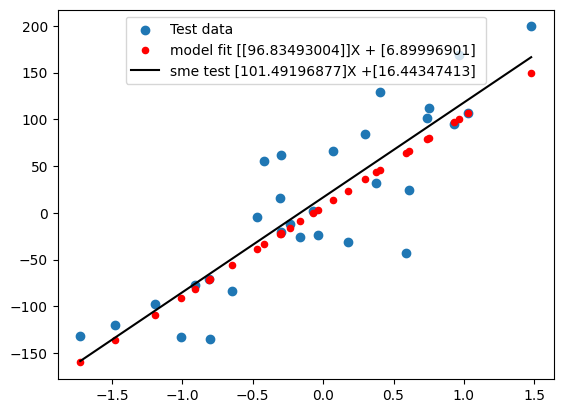

In [83]:
plt.scatter(X_test,y_test,label="Test data")
y_predicted=model.predict(X_test)

s=marker_size=20
plt.scatter(X_test,y_predicted,color = 'r',label=f"model fit {w}X + {b}",s=marker_size)


plt.plot(X_test_sme_plot,y_sme_to_plot,color = 'k', label=f"sme test {sme_m}X +{sme_b} ")
plt.legend(loc='upper center')

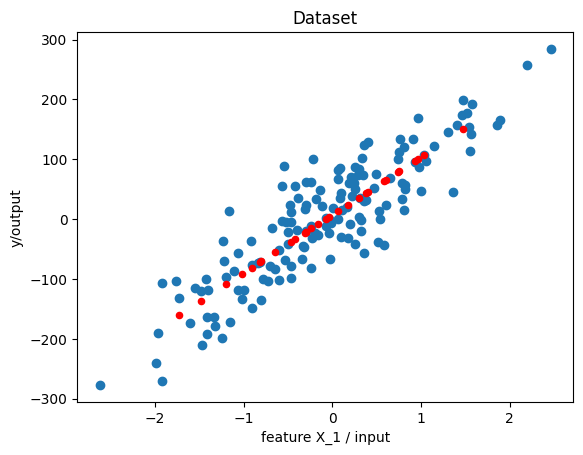

In [84]:
plt.scatter(X, y)
plt.xlabel("feature X_1 / input")
plt.ylabel("y/output")
plt.title("Dataset")
s=marker_size=20
plt.scatter(X_test,y_predicted,color = 'r',label=f"model fit {w}X + {b}",s=marker_size)

# Siguiendo el video

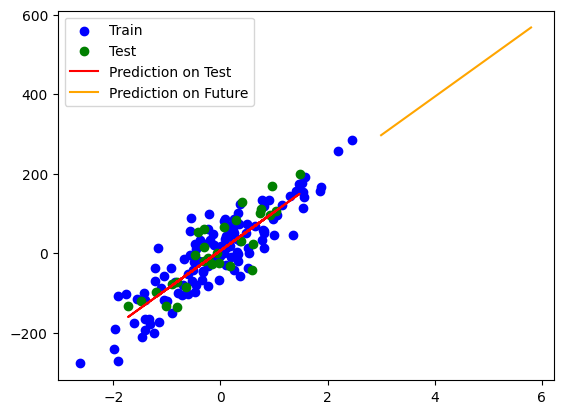

In [85]:
plt.scatter(X_train,y_train,c="b",label="Train")
plt.scatter(X_test,y_test,c="g",label="Test")
plt.plot(X_test,model.predict(X_test),c="r",label="Prediction on Test")
#Generate numbers from -3 to 3 in steps of 0.2
# X_tmp = np.arange(-3,3,0.2)
X_tmp = np.arange(3,6,0.2)
# -1 number of adecuate dimentions and 1 means in the second dimention is only 1 element
X_tmp = X_tmp.reshape(-1, 1)
# plt.plot(X_tmp,model.predict(X_tmp),c="orange",label="Prediction on [-3,3]")
plt.plot(X_tmp,model.predict(X_tmp),c="orange",label="Prediction on Future")

plt.legend()

In [86]:
# MSE on Training
y_hat_train = model.predict(X_train)
mse_training = np.mean((y_hat_train -y_train)**2)
print(f"MSE Training: {mse_training}")

# MSE on Testing
y_hat_test = model.predict(X_test)
mse_test = np.mean((y_hat_test -y_test)**2)
print(f"MSE Test: {mse_test}")

MSE Training: 20261.16635644363
MSE Test: 13932.284822853038
